In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import random
import operator
import math
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(800, 22)

In [4]:
df.head()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [5]:
X = df.drop(['Id','kredit', 'gastarb', 'telef', 'laufkont', 'pers'], axis=1)

In [6]:
X.head()

,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf
0,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3
1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3
2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2
3,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2
4,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2


In [7]:
X.shape

(800, 16)

In [8]:
X.isnull().sum()

laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
dtype: int64

In [9]:
scale = StandardScaler()
X_scaled = X # pd.DataFrame(scale.fit_transform(X.values), columns=X.columns)
X_scaled 

,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf
0,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3
1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3
2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2
3,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2
4,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,18,4,0,3966,1,5,1,2,1,4,1,33,1,1,3,3
796,12,0,3,6199,1,3,4,3,1,2,2,28,3,1,2,3
797,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4
798,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4


In [10]:
X_scaled.shape

(800, 16)

In [11]:
k = 3 # number of clusters

In [12]:
m = 2 # m parameter

In [13]:
MAX_ITERS = 12  # number of iterations

In [14]:
n = X_scaled.shape[0]
n 

800

In [15]:
d = X_scaled.shape[1] #dimension of cluster
d

16

In [16]:
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

In [17]:
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = list()
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(X_scaled.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [18]:
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(X_scaled.iloc[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

In [19]:
def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()

    for i in range(MAX_ITERS):
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        
    return membership_mat, cluster_centers

In [20]:
final_weights,Centers = fuzzyCMeansClustering()

In [21]:
final_weights = np.asarray(final_weights).round(2)
final_weights

array([[0.02, 0.  , 0.98],
       [0.55, 0.02, 0.44],
       [0.04, 0.01, 0.96],
       ...,
       [0.12, 0.82, 0.07],
       [0.51, 0.36, 0.13],
       [0.54, 0.33, 0.13]])

In [22]:
final_weights.shape

(800, 3)

In [23]:
Centers = np.asarray(Centers)
Centers

array([[2.45982147e+01, 2.55763067e+00, 2.72144615e+00, 3.97933995e+03,
        2.10249551e+00, 3.39999808e+00, 2.64763179e+00, 2.64835067e+00,
        1.15314543e+00, 2.86574447e+00, 2.50021031e+00, 3.45374256e+01,
        2.70757150e+00, 1.93720512e+00, 1.41133865e+00, 2.94585271e+00],
       [3.64489165e+01, 2.42122811e+00, 2.76754418e+00, 9.41210150e+03,
        2.62814421e+00, 3.26063288e+00, 2.28710470e+00, 2.68045939e+00,
        1.10736818e+00, 2.79036623e+00, 3.03108115e+00, 3.64362262e+01,
        2.59882139e+00, 2.13497718e+00, 1.35713042e+00, 3.26793243e+00],
       [1.47585051e+01, 2.62183278e+00, 2.81575192e+00, 1.47746882e+03,
        2.06331284e+00, 3.40692742e+00, 3.24757653e+00, 2.70481877e+00,
        1.15023787e+00, 2.78210801e+00, 2.11086903e+00, 3.57816327e+01,
        2.68097147e+00, 1.90276684e+00, 1.43890004e+00, 2.77791709e+00]])

In [24]:
Centers.shape

(3, 16)

In [25]:
def getAlphaCut(final_weights, threshold):
    crisp = np.zeros((n,k))
    for i in range(n):
        cluster = []
        for j in range(k): 
            #print(final_weights[i,j])
            if final_weights[i,j] > threshold:
                cluster.append(j+1)
                #print(j+1)
            else :
                cluster.append(0)
                #print(0)
        
        #print(cluster)
        crisp[i] = cluster
        
    return crisp

In [26]:
alpha = getAlphaCut(final_weights, threshold=0.33)
alpha.tolist()

[[0.0, 0.0, 3.0],
 [1.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [0.0, 2.0, 0.0],
 [1.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 2.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 3.0],
 [1.0, 0.0, 3.0],
 [1.0, 0.0, 0.0],
 [0.0, 2.0, 0.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0, 3.0],
 [0.0, 0.0

# K mean : 

In [27]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [28]:
X_train.shape

(800, 22)

In [29]:
X_train.head()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [30]:
X_train.describe()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,478.101250,2.648750,20.496250,2.582500,2.785000,3210.290000,2.143750,3.39500,2.952500,2.687500,...,2.353750,35.542500,2.673750,1.941250,1.420000,2.901250,1.845000,1.398750,1.957500,0.750000
std,278.883661,1.250931,12.006881,1.099866,2.680533,2792.840814,1.589416,1.22407,1.134395,0.696743,...,1.057122,11.175724,0.709182,0.527396,0.586541,0.661094,0.362131,0.489947,0.201853,0.433284
min,0.000000,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,238.750000,1.750000,12.000000,2.000000,1.000000,1364.000000,1.000000,3.00000,2.000000,2.000000,...,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.750000
50%,472.000000,2.000000,18.000000,2.000000,2.000000,2264.000000,1.000000,3.00000,3.000000,3.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,707.250000,4.000000,24.000000,4.000000,3.000000,3907.250000,3.000000,5.00000,4.000000,3.000000,...,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,999.000000,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.00000,4.000000,4.000000,...,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        800 non-null    int64
 1   laufkont  800 non-null    int64
 2   laufzeit  800 non-null    int64
 3   moral     800 non-null    int64
 4   verw      800 non-null    int64
 5   hoehe     800 non-null    int64
 6   sparkont  800 non-null    int64
 7   beszeit   800 non-null    int64
 8   rate      800 non-null    int64
 9   famges    800 non-null    int64
 10  buerge    800 non-null    int64
 11  wohnzeit  800 non-null    int64
 12  verm      800 non-null    int64
 13  alter     800 non-null    int64
 14  weitkred  800 non-null    int64
 15  wohn      800 non-null    int64
 16  bishkred  800 non-null    int64
 17  beruf     800 non-null    int64
 18  pers      800 non-null    int64
 19  telef     800 non-null    int64
 20  gastarb   800 non-null    int64
 21  kredit    800 non-null    int64
dtypes:

In [32]:
X_train.isnull().sum()

Id          0
laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

In [33]:
X_test.shape

(200, 21)

In [34]:
X_test.head()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,4,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,2,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,4,3,23,3,1,2,2,2,1,2
2,18,2,36,4,3,2337,1,5,4,3,...,4,1,36,3,2,1,3,2,1,2
3,20,1,6,4,0,3676,1,3,1,3,...,3,1,37,3,1,3,3,1,1,2
4,22,2,36,2,5,2384,1,2,4,3,...,1,4,33,3,1,1,2,2,1,2


In [35]:
X_test.describe()

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,585.095000,2.290000,22.530000,2.395000,3.000000,3515.080000,1.950,3.340000,3.055000,2.660000,...,2.925000,2.375000,35.540000,2.68000,1.875000,1.355000,2.915000,1.845000,1.425000,1.985000
std,311.895834,1.246462,12.158877,1.001995,2.987411,2933.884667,1.536,1.144969,1.052384,0.753151,...,1.116066,1.024511,12.063834,0.69282,0.539286,0.538913,0.624278,0.362813,0.495584,0.121857
min,4.000000,1.000000,6.000000,0.000000,0.000000,338.000000,1.000,1.000000,1.000000,1.000000,...,1.000000,1.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,303.000000,1.000000,12.000000,2.000000,1.000000,1373.500000,1.000,3.000000,2.000000,2.000000,...,2.000000,1.000000,26.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,661.000000,2.000000,19.000000,2.000000,2.000000,2443.000000,1.000,3.000000,3.000000,3.000000,...,3.000000,2.000000,33.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,857.500000,4.000000,30.000000,3.000000,3.000000,4572.500000,2.250,4.000000,4.000000,3.000000,...,4.000000,3.000000,41.250000,3.00000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,996.000000,4.000000,60.000000,4.000000,10.000000,14896.000000,5.000,5.000000,4.000000,4.000000,...,4.000000,4.000000,75.000000,3.00000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        200 non-null    int64
 1   laufkont  200 non-null    int64
 2   laufzeit  200 non-null    int64
 3   moral     200 non-null    int64
 4   verw      200 non-null    int64
 5   hoehe     200 non-null    int64
 6   sparkont  200 non-null    int64
 7   beszeit   200 non-null    int64
 8   rate      200 non-null    int64
 9   famges    200 non-null    int64
 10  buerge    200 non-null    int64
 11  wohnzeit  200 non-null    int64
 12  verm      200 non-null    int64
 13  alter     200 non-null    int64
 14  weitkred  200 non-null    int64
 15  wohn      200 non-null    int64
 16  bishkred  200 non-null    int64
 17  beruf     200 non-null    int64
 18  pers      200 non-null    int64
 19  telef     200 non-null    int64
 20  gastarb   200 non-null    int64
dtypes: int64(21)
memory usage: 32.9 KB


In [37]:
X_test.isnull().sum()

Id          0
laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
dtype: int64

In [38]:
Y_train = X_train['kredit']
X_train.drop(['kredit'], axis=1,inplace=True)
X_train.shape

(800, 21)

In [39]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)
X_scaled_test = scale.fit_transform(X_test)

In [40]:
X_scaled.shape

(800, 21)

In [41]:
Y_train.describe()

count    800.000000
mean       0.750000
std        0.433284
min        0.000000
25%        0.750000
50%        1.000000
75%        1.000000
max        1.000000
Name: kredit, dtype: float64

In [42]:
Y_train.shape

(800,)

In [43]:
Y_train.value_counts().sort_index()

0    200
1    600
Name: kredit, dtype: int64

<AxesSubplot:>

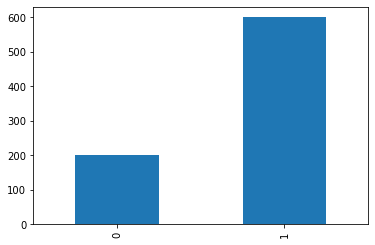

In [44]:
Y_train.value_counts().sort_index().plot.bar()

In [45]:
model = SVC(kernel='linear')
model.fit(X_scaled,Y_train)

SVC(kernel='linear')

In [46]:
Y_predicted = model.predict(X_scaled_test)
Y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)